In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

In [17]:
N=1000
gaussian_quantiles=make_gaussian_quantiles(mean=None,
                        cov=0.1,
                        n_samples=N,
                        n_features=2,
                        n_classes=2,
                        shuffle=True,
                        random_state=None
                    )
X,Y=gaussian_quantiles

In [18]:
X.shape

(1000, 2)

In [19]:
Y.shape

(1000,)

In [20]:
Y = Y[:,np.newaxis]

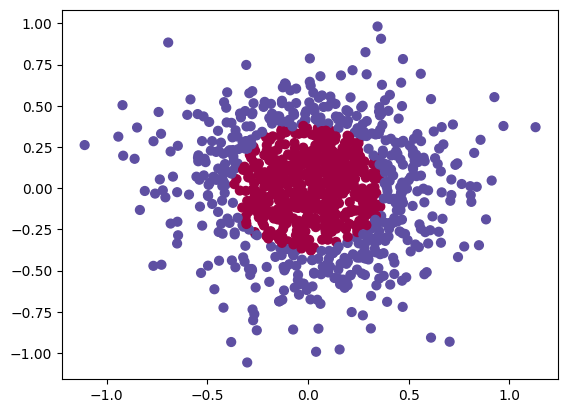

In [21]:
plt.scatter(X[:,0],X[:,1],c=Y[:,0],s=40,cmap=plt.cm.Spectral)

In [22]:
def sigmoid(x, derivate = False):
    if derivate:
        return np.exp(-x)/(( np.exp(-x) +1)**2)
    else:    
        return 1 / (1 + np.exp(-x))

def relu(x, derivate = False):
    if derivate:
        x[x <= 0] = 0
        x[x > 0 ] = 1
        return x
    else:    
        return np.maximum(0, x)

In [23]:
def mse(y, y_hat, derivate = False):
  if derivate:
    return (y_hat - y)
  else:
    return np.mean((y_hat - y)**2)

In [24]:
def initialize_parameters_deep(layers_dim):
  parameters = {}
  L = len(layers_dim)
  for l in range(0,L-1):
    parameters['W' + str(l+1)] = (np.random.rand(layers_dim[l],layers_dim[l+1]) * 2) -1
    parameters['b' + str(l+1)] = (np.random.rand(1,layers_dim[l+1]) * 2) -1
  return parameters

In [25]:
params=initialize_parameters_deep([2,4,8,1])

In [26]:
params['W1']

array([[-0.90092991,  0.09933427,  0.06558483, -0.09924568],
       [-0.14278171, -0.28150198, -0.15887191, -0.62547905]])

In [27]:
np.matmul(X,params['W1'])

array([[ 0.13005626, -0.01658604, -0.01074687,  0.00971884],
       [ 0.2043467 , -0.08989567, -0.05323673, -0.11567775],
       [ 0.43699467, -0.10120096, -0.0620035 , -0.06062113],
       ...,
       [-0.03005014, -0.03405395, -0.01909119, -0.07996318],
       [ 0.02745925, -0.00896908, -0.00538233, -0.00916315],
       [ 0.11387628,  0.08888559,  0.0494759 ,  0.22063522]])

In [28]:
X@params['W1']

array([[ 0.13005626, -0.01658604, -0.01074687,  0.00971884],
       [ 0.2043467 , -0.08989567, -0.05323673, -0.11567775],
       [ 0.43699467, -0.10120096, -0.0620035 , -0.06062113],
       ...,
       [-0.03005014, -0.03405395, -0.01909119, -0.07996318],
       [ 0.02745925, -0.00896908, -0.00538233, -0.00916315],
       [ 0.11387628,  0.08888559,  0.0494759 ,  0.22063522]])

In [29]:
params['A0']=X

In [30]:
def train(X_data,lr,params,training=True):
## Forward

    params['A0'] = X_data
        
    params['Z1'] = np.matmul(params['A0'],params['W1']) + params['b1']
    params['A1'] = relu(params['Z1'])
    
    params['Z2'] = np.matmul(params['A1'],params['W2']) + params['b2']
    params['A2'] = relu(params['Z2'])
       
    params['Z3'] = np.matmul(params['A2'],params['W3']) + params['b3']
    params['A3'] = sigmoid(params['Z3'])
  
    output = params['A3']
    
    if training:
    # Backpropagation
    
        params['dZ3'] =  mse(Y,output,True) * sigmoid(params['A3'],True)
        params['dW3'] = np.matmul(params['A2'].T,params['dZ3'])
        
        params['dZ2'] = np.matmul(params['dZ3'],params['W3'].T) * relu(params['A2'],True)
        params['dW2'] = np.matmul(params['A1'].T,params['dZ2'])
        
        params['dZ1'] = np.matmul(params['dZ2'],params['W2'].T) * relu(params['A1'],True)
        params['dW1'] = np.matmul(params['A0'].T,params['dZ1'])

        
        ## Gradinet Descent:
           
        params['W3'] = params['W3'] - params['dW3'] * lr
        params['b3'] = params['b3'] - (np.mean(params['dZ3'],axis=0, keepdims=True)) * lr
        
        params['W2'] = params['W2'] - params['dW2'] * lr
        params['b2'] = params['b2'] - (np.mean(params['dZ2'],axis=0, keepdims=True)) * lr
        
        params['W1'] = params['W1'] -params['dW1'] * lr
        params['b1'] = params['b1'] - (np.mean(params['dZ1'],axis=0, keepdims=True)) * lr
    
    return output